# Dask Delayed

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Dask Delayed"
* https://docs.dask.org/en/latest/delayed.html
* Jesse C. Daniel. Data Science with Python and Dask.
* https://saturncloud.io/blog/a-data-scientist-s-guide-to-lazy-evaluation-with-dask/
* https://www.coiled.io/blog/how-to-learn-dask-in-2021
* https://realpython.com/python-concurrency/

## Задачи для совместного разбора

1\. Напишите 2 функции, имитирующие CPU-bound задачу и IO-bound задачу:

`cpu_task()`: генерирует 100 тыс. случайных чисел и возвращает их сумму (без использования `numpy`)

`io_task()`: "спит" 0.1 сек, затем генерирует случайное число и возвращает его

Замерьте время выполнения 100 последовательных вызовов каждой из этих функций. Распараллелив вычисления при помощи `dask.delayed`, сократите время выполнения. Исследуйте, как зависит время вычислений от выбранного планировщика `scheduler`.

## Лабораторная работа 14

In [11]:
import numpy as np
import dask.delayed as delayed
import dask
from time import sleep
import random
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ET

<p class="task" id="1"></p>

1\. Напишите функцию `read_profiles`, которая считывает один файл формата xml из каталога `reviewers_full` и по данным этого файла формирует список словарей, содержащих следующие ключи: `id`, `username`, `name`, `sex`, `country`, `mail`, `registered`, `birthdate`, `name_prefix`, `country_code`. Часть из этих значений в исходном файле хранится в виде тэгов, часть - в виде атрибутов тэгов. Для конкретного человека какие-то из этих ключей могут отсутствовать. 

Обработайте все файлы, вызвав последовательно вызвав эту функцию для каждого из них, и собрав результаты в один общий список словарей `profiles`. Измерьте время выполнения кода.

Выведите на экран уникальные значения по ключам `name_prefix` и `country_code`


```python
def read_profiles(file: str) -> list[dict]:
    pass
```

In [342]:
from pathlib import Path

In [333]:
cols = ["id", "username", "name", "sex", "country", "mail", "registered", "birthdate"]

def read_profiles(file: str) -> list[dict]:
  with open(file, 'r') as f:
      data1 = f.readlines()

  data1 = ''.join(data1[2:-1]).replace('\n','')
  data1 = re.findall(r'<user.*?>.*?</user>', data1)

  profile = []
  for i in data1:
    d = {}
    for col in cols:
      val = re.findall(f'<{col}.*>(.+?)</{col}>', i)
      if val:
        d[col] = val[0]
      else:
        d[col] = None

    code = re.findall(r'code="(.*?)">', i)
    pref = re.findall(r'prefix="(.*?)">', i)
    if code:
      d["country_code"] = code[0]
    else:
      d["country_code"] = None
    if pref:
      d["name_prefix"] = pref[0]
    else:
      d["name_prefix"] = None
    
    profile.append(d)
  
  return profile

In [334]:
%%time
directory = 'reviews_full'
pathlist = Path(directory).glob('*.xml')

profiles = []
for path in pathlist:
    profiles.extend(read_profiles(path))

CPU times: user 54.5 s, sys: 1.7 s, total: 56.2 s
Wall time: 56.7 s


In [338]:
%%time
s_prefix1 = set()
for i in profiles:
  if i['name_prefix']:
    s_prefix1.add(i['name_prefix'])
s_prefix1

CPU times: user 289 ms, sys: 1.84 ms, total: 291 ms
Wall time: 318 ms


{'Dr.', 'Miss', 'Mr.', 'Mrs.', 'Ms.'}

In [340]:
%%time
s_ccode1 = set()
for i in profiles:
    if i['country_code']:
      s_ccode1.add(i['country_code'])
s_ccode1

CPU times: user 217 ms, sys: 1.91 ms, total: 219 ms
Wall time: 223 ms


{'AD',
 'AE',
 'AF',
 'AG',
 'AI',
 'AL',
 'AM',
 'AN',
 'AO',
 'AR',
 'AS',
 'AT',
 'AU',
 'AW',
 'AZ',
 'BA',
 'BB',
 'BD',
 'BE',
 'BF',
 'BG',
 'BH',
 'BI',
 'BJ',
 'BM',
 'BN',
 'BO',
 'BR',
 'BS',
 'BT',
 'BW',
 'BY',
 'BZ',
 'CA',
 'CC',
 'CF',
 'CH',
 'CK',
 'CL',
 'CM',
 'CN',
 'CO',
 'CR',
 'CU',
 'CV',
 'CX',
 'CY',
 'CZ',
 'DE',
 'DJ',
 'DK',
 'DM',
 'DO',
 'DZ',
 'EC',
 'EE',
 'EG',
 'EH',
 'ER',
 'ES',
 'ET',
 'FI',
 'FJ',
 'FK',
 'FO',
 'FR',
 'GA',
 'GB',
 'GD',
 'GE',
 'GF',
 'GG',
 'GH',
 'GI',
 'GL',
 'GM',
 'GN',
 'GP',
 'GQ',
 'GR',
 'GS',
 'GT',
 'GU',
 'GW',
 'GY',
 'HM',
 'HN',
 'HR',
 'HT',
 'HU',
 'ID',
 'IE',
 'IL',
 'IM',
 'IN',
 'IQ',
 'IR',
 'IS',
 'IT',
 'JE',
 'JM',
 'JO',
 'JP',
 'KE',
 'KH',
 'KI',
 'KM',
 'KN',
 'KW',
 'KY',
 'KZ',
 'LA',
 'LB',
 'LC',
 'LI',
 'LK',
 'LR',
 'LS',
 'LT',
 'LU',
 'LV',
 'LY',
 'MA',
 'MC',
 'ME',
 'MF',
 'MG',
 'MH',
 'ML',
 'MM',
 'MN',
 'MO',
 'MP',
 'MQ',
 'MR',
 'MS',
 'MT',
 'MU',
 'MV',
 'MW',
 'MX',
 'MY',
 'MZ',

In [343]:
# проверка, что в данных есть country_code, который равен 'nan'
for i in profiles:
  if i['country_code'] == 'nan':
    print(i)
    break

{'id': '93893', 'username': 'emily23', 'name': None, 'sex': None, 'country': 'Namibia', 'mail': None, 'registered': '2019-09-27', 'birthdate': '1963-03-22', 'country_code': 'nan', 'name_prefix': None}


<p class="task" id="2"></p>

2\. Задекорируйте функцию `read_profiles` при помощи `dask.delayed`. Cоздайте список `reviewers`, состоящий из 20 объектов `Delayed` (по одному объекту на файл). Повторите решение задачи 1, распараллелив вычисления при помощи `dask`. Измерьте время выполнения кода. Добейтесь существенного (в разы) уменьшения времени выполнения в сравнении с решением задачи 1.

In [350]:
read_profiles_delayed = dask.delayed(read_profiles)

directory = 'reviews_full'
pathlist = Path(directory).glob('*.xml')

reviewers = [read_profiles_delayed(path) for path in pathlist]
reviewers

[Delayed('read_profiles-54a1b630-7737-4ea5-8b76-1fef3d468d01'),
 Delayed('read_profiles-1d267559-5d79-4701-b1b8-3cb32a5390a7'),
 Delayed('read_profiles-b643c840-d041-4fde-ac7c-97bd19eeb38b'),
 Delayed('read_profiles-6a9cf180-da77-4e57-8ffc-c6a9df8af576'),
 Delayed('read_profiles-5852192a-38fd-4e64-90ec-c0473383c4d2'),
 Delayed('read_profiles-57ec43c9-8b85-485c-a066-13d85ea11a42'),
 Delayed('read_profiles-d9cb66e0-1109-46f1-8002-4d9ee5de3b97'),
 Delayed('read_profiles-8c6b80f2-f8d3-4dc0-90ef-63dbbae5be8f'),
 Delayed('read_profiles-cc31246f-4fba-4c51-a66c-50c9afeeb595'),
 Delayed('read_profiles-f44f65af-0b0d-47d7-bb5f-aab1badaedc8'),
 Delayed('read_profiles-c7ec9761-045c-431c-a177-005cc95d02a0'),
 Delayed('read_profiles-85478f25-cfe3-4c5b-8bc8-50202aadb2d3'),
 Delayed('read_profiles-85d23c7c-1e54-4483-8689-49ac5b272f05'),
 Delayed('read_profiles-ef4bc73b-f890-45fb-a1b8-0c23a2e21d73'),
 Delayed('read_profiles-dc73279a-895f-43c9-8aed-ae98564642e1'),
 Delayed('read_profiles-006ce948-0781-42

In [351]:
%%time
profiles2 = dask.delayed(sum)(reviewers,[]).compute(scheduler='processes')

CPU times: user 6.09 s, sys: 2.15 s, total: 8.24 s
Wall time: 1min 7s


**CPU times уменьшилось в 6.82 раза**\
**Wall time увеличилось в 1.18 раз (10s)**

In [356]:
%%time
s_prefix2 = set()
for i in profiles2:
  if i['name_prefix']:
    s_prefix2.add(i['name_prefix'])
s_prefix2

CPU times: user 193 ms, sys: 1.98 ms, total: 195 ms
Wall time: 204 ms


{'Dr.', 'Miss', 'Mr.', 'Mrs.', 'Ms.'}

In [357]:
s_prefix1 == s_prefix2

True

In [358]:
%%time
s_ccode2 = set()
for i in profiles2:
    if i['country_code']:
      s_ccode2.add(i['country_code'])
s_ccode2

CPU times: user 340 ms, sys: 0 ns, total: 340 ms
Wall time: 379 ms


{'AD',
 'AE',
 'AF',
 'AG',
 'AI',
 'AL',
 'AM',
 'AN',
 'AO',
 'AR',
 'AS',
 'AT',
 'AU',
 'AW',
 'AZ',
 'BA',
 'BB',
 'BD',
 'BE',
 'BF',
 'BG',
 'BH',
 'BI',
 'BJ',
 'BM',
 'BN',
 'BO',
 'BR',
 'BS',
 'BT',
 'BW',
 'BY',
 'BZ',
 'CA',
 'CC',
 'CF',
 'CH',
 'CK',
 'CL',
 'CM',
 'CN',
 'CO',
 'CR',
 'CU',
 'CV',
 'CX',
 'CY',
 'CZ',
 'DE',
 'DJ',
 'DK',
 'DM',
 'DO',
 'DZ',
 'EC',
 'EE',
 'EG',
 'EH',
 'ER',
 'ES',
 'ET',
 'FI',
 'FJ',
 'FK',
 'FO',
 'FR',
 'GA',
 'GB',
 'GD',
 'GE',
 'GF',
 'GG',
 'GH',
 'GI',
 'GL',
 'GM',
 'GN',
 'GP',
 'GQ',
 'GR',
 'GS',
 'GT',
 'GU',
 'GW',
 'GY',
 'HM',
 'HN',
 'HR',
 'HT',
 'HU',
 'ID',
 'IE',
 'IL',
 'IM',
 'IN',
 'IQ',
 'IR',
 'IS',
 'IT',
 'JE',
 'JM',
 'JO',
 'JP',
 'KE',
 'KH',
 'KI',
 'KM',
 'KN',
 'KW',
 'KY',
 'KZ',
 'LA',
 'LB',
 'LC',
 'LI',
 'LK',
 'LR',
 'LS',
 'LT',
 'LU',
 'LV',
 'LY',
 'MA',
 'MC',
 'ME',
 'MF',
 'MG',
 'MH',
 'ML',
 'MM',
 'MN',
 'MO',
 'MP',
 'MQ',
 'MR',
 'MS',
 'MT',
 'MU',
 'MV',
 'MW',
 'MX',
 'MY',
 'MZ',

In [359]:
s_ccode1 == s_ccode2

True

<p class="task" id="3"></p>

3\. Задекорируйте функцию из задания 1 при помощи `dask.delayed` и создайте список `reviewers`, состоящий из 20 объектов `Delayed` (по одному объекту на файл). Из списка объектов `Delayed`, создайте `dask.bag` при помощи метода `db.from_delayed`. Добавьте ключ `birth_year`, в котором хранится год рождения человека. Оставьте в выборке только тех людей, которые __наверняка__ моложе 1980 года. Преобразуйте поле `id` к целому типу.

Выведите на экран количество элементов в созданном `Bag`.

In [360]:
import dask.bag as db

In [367]:
def get_birth_year(x):
  if x['birthdate']:
    x['birth_year'] = int(x['birthdate'].split('-')[0])
  else:
    x['birth_year'] = None

  if x['id']:
    x['id'] = int(x['id'])
    
  return x

In [368]:
%%time
bg3 = db.from_delayed(reviewers)
bg3_with_year = bg3.map(get_birth_year)
bg3_with_year.take(3)

CPU times: user 30.9 ms, sys: 28 µs, total: 30.9 ms
Wall time: 3.1 s


({'id': 52390,
  'username': 'jasmine20',
  'name': None,
  'sex': None,
  'country': None,
  'mail': 'thomas40@gmail.com',
  'registered': None,
  'birthdate': None,
  'country_code': None,
  'name_prefix': None,
  'birth_year': None},
 {'id': 48514,
  'username': 'mccarthytodd',
  'name': 'Benjamin Cruz',
  'sex': 'M',
  'country': None,
  'mail': 'raymond39@gmail.com',
  'registered': '2007-04-25',
  'birthdate': '1990-06-14',
  'country_code': None,
  'name_prefix': 'Dr.',
  'birth_year': 1990},
 {'id': 40507,
  'username': 'rsanchez',
  'name': None,
  'sex': None,
  'country': 'Egypt',
  'mail': None,
  'registered': '2004-11-09',
  'birthdate': '2022-03-24',
  'country_code': 'EG',
  'name_prefix': None,
  'birth_year': 2022})

In [369]:
def is_younger(x):
  return x['birth_year'] is not None and x['birth_year'] > 1980

In [370]:
%%time
bg3_young = bg3_with_year.filter(is_younger)
bg3_young.take(3)

CPU times: user 29.6 ms, sys: 1.19 ms, total: 30.8 ms
Wall time: 2.89 s


({'id': 48514,
  'username': 'mccarthytodd',
  'name': 'Benjamin Cruz',
  'sex': 'M',
  'country': None,
  'mail': 'raymond39@gmail.com',
  'registered': '2007-04-25',
  'birthdate': '1990-06-14',
  'country_code': None,
  'name_prefix': 'Dr.',
  'birth_year': 1990},
 {'id': 40507,
  'username': 'rsanchez',
  'name': None,
  'sex': None,
  'country': 'Egypt',
  'mail': None,
  'registered': '2004-11-09',
  'birthdate': '2022-03-24',
  'country_code': 'EG',
  'name_prefix': None,
  'birth_year': 2022},
 {'id': 87421,
  'username': 'ramirezheather',
  'name': 'William Weaver',
  'sex': None,
  'country': None,
  'mail': 'daniel25@hotmail.com',
  'registered': '2018-05-20',
  'birthdate': '1997-03-29',
  'country_code': None,
  'name_prefix': None,
  'birth_year': 1997})

In [371]:
%%time
bg3_young.count().compute()

CPU times: user 301 ms, sys: 30.7 ms, total: 332 ms
Wall time: 51.9 s


287501

<p class="task" id="4"></p>

4\. Преобразуйте `Bag` из предыдущего задания в `dd.DataFrame`. Найдите и выведите на экран страну с наибольшим количеством пользователей.

In [372]:
dd4 = bg3_young.to_dataframe()
dd4.head()

,id,username,name,sex,country,mail,registered,birthdate,country_code,name_prefix,birth_year
0,48514,mccarthytodd,Benjamin Cruz,M,None,raymond39@gmail.com,2007-04-25,1990-06-14,None,Dr.,1990
1,40507,rsanchez,None,None,Egypt,None,2004-11-09,2022-03-24,EG,None,2022
2,87421,ramirezheather,William Weaver,None,None,daniel25@hotmail.com,2018-05-20,1997-03-29,None,None,1997
3,68609,lauren64,None,M,France,None,None,1982-08-17,FR,None,1982
4,53251,katelyn58,William Noble,M,Botswana,None,None,2015-09-07,BW,Mr.,2015


In [373]:
test4 = dd4.head()

In [377]:
%%time
dd4['country'].value_counts().compute()

CPU times: user 58.2 s, sys: 399 ms, total: 58.6 s
Wall time: 58.9 s


Korea                1185
Congo                1146
Liberia               660
Brunei Darussalam     660
Gambia                658
                     ... 
Guadeloupe            540
Timor-Leste           538
Saint Martin          531
Saint Barthelemy      530
Bangladesh            514
Name: country, Length: 243, dtype: int64

**В данных могут быть дублирующиеся 'id'. Так как нужно посчитать кол-во пользователей, то от дубликатов следует избавиться**

In [436]:
%%time
dd4[['id','country']].drop_duplicates('id')['country'].value_counts().compute()

CPU times: user 3.35 s, sys: 395 ms, total: 3.74 s
Wall time: 56.8 s


Congo                     376
Korea                     375
Maldives                  226
Ghana                     226
Pitcairn Islands          226
                         ... 
Cyprus                    165
Guadeloupe                164
Saint Barthelemy          163
Libyan Arab Jamahiriya    163
Honduras                  162
Name: country, Length: 243, dtype: int64

<p class="task" id="5"></p>

5\. Даны две функции: `get_product` и `add_to_db`. Воспользовавшись функцией `get_product`, получите список из 16 товаров с ID от 1 до 16. Добавьте каждый товар в БД __по отдельности__ при помощи функции `add_to_db`. Посчитайте общую сумму добавленных товаров и выведите ее на экран. Замерьте время выполнения данного решения.

При решении данной задачи не используйте параллельных вычислений (включая `dask`). 

__Важно__: выполните ячейку ниже и далее работайте с запущенным `Client` (даже если вы его не используете, как в этой задаче).

In [378]:
# ЭТА ЯЧЕЙКА ЯВЛЯЕТСЯ ЧАСТЬЮ УСЛОВИЯ ЗАДАЧИ
# ИЗМЕНЯТЬ СОДЕРЖИМОЕ ЭТОЙ ЯЧЕЙКИ ЗАПРЕЩЕНО

import requests
from dask.distributed import Semaphore, Client
import time

client = Client()
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:41559
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33937'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46837'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42743', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42743
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:57672
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:39679', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:39679
INFO:distributed.core:Startin

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 2,Total memory: 12.68 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41559,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 2
Started: Just now,Total memory: 12.68 GiB
Comm: tcp://127.0.0.1:42743,Total threads: 1
Dashboard: http://127.0.0.1:40353/status,Memory: 6.34 GiB
Nanny: tcp://127.0.0.1:33937,


In [379]:
# ЭТА ЯЧЕЙКА ЯВЛЯЕТСЯ ЧАСТЬЮ УСЛОВИЯ ЗАДАЧИ
# ИЗМЕНЯТЬ СОДЕРЖИМОЕ ЭТОЙ ЯЧЕЙКИ ЗАПРЕЩЕНО

def get_product(pid: int) -> dict:
    """Делает запрос к dummyjson и возвращает информацию о товаре"""
    return requests.get(f"https://dummyjson.com/products/{pid}").json()

def estimate_fake_delay_time(n: int) -> float:
    """Возвращает кол-во секунд для задержки в зависимости от числа n"""
    return 0.07*n**2 -0.03*n + 2

sem = Semaphore(2)

def add_to_db(*products):
    """Принимает на вход переменное количество словарей (товаров), считает сумму и имитирует
    длительную операцию сохранения этих элементов в БД, время выполнения которой зависит от кол-ва переданных элементо. 
    Одновременно могут обрабатываться только 2 запроса (это контролируется семафором)."""
    ttl = 0
    for p in products:
        print("Added {} to db".format(p["title"]))
        ttl += p["price"]
    with sem:    
        time.sleep(estimate_fake_delay_time(len(products)))
    return ttl

In [384]:
%%time
list_of_products = [get_product(i) for i in range(1,17)]

sum_of_products = 0
for i in list_of_products:
  sum_of_products += add_to_db(i)

sum_of_products

Added iPhone 9 to db
Added iPhone X to db
Added Samsung Universe 9 to db
Added OPPOF19 to db
Added Huawei P30 to db
Added MacBook Pro to db
Added Samsung Galaxy Book to db
Added Microsoft Surface Laptop 4 to db
Added Infinix INBOOK to db
Added HP Pavilion 15-DK1056WM to db
Added perfume Oil to db
Added Brown Perfume to db
Added Fog Scent Xpressio Perfume to db
Added Non-Alcoholic Concentrated Perfume Oil to db
Added Eau De Perfume Spray to db
Added Hyaluronic Acid Serum to db
CPU times: user 2.16 s, sys: 243 ms, total: 2.4 s
Wall time: 36.2 s


10656

<p class="task" id="6"></p>

6\. Создайте отложенные версии функций `get_product` и `add_to_db`. Постройте при помощи этих функций граф вычислений, который будет выглядеть следующим образом:

Здесь для каждого товара параллельно происходит вызов `get_product`, за которым следует вызов  `add_to_db`. Используя построенный граф, посчитайте общую сумму добавленных товаров и выведите ее на экран. Замерьте время выполнения данного решения.

В качестве демонстрации вставьте скриншот графа в процессе вычислений из дэшборда или результат работы метода `visualize`.

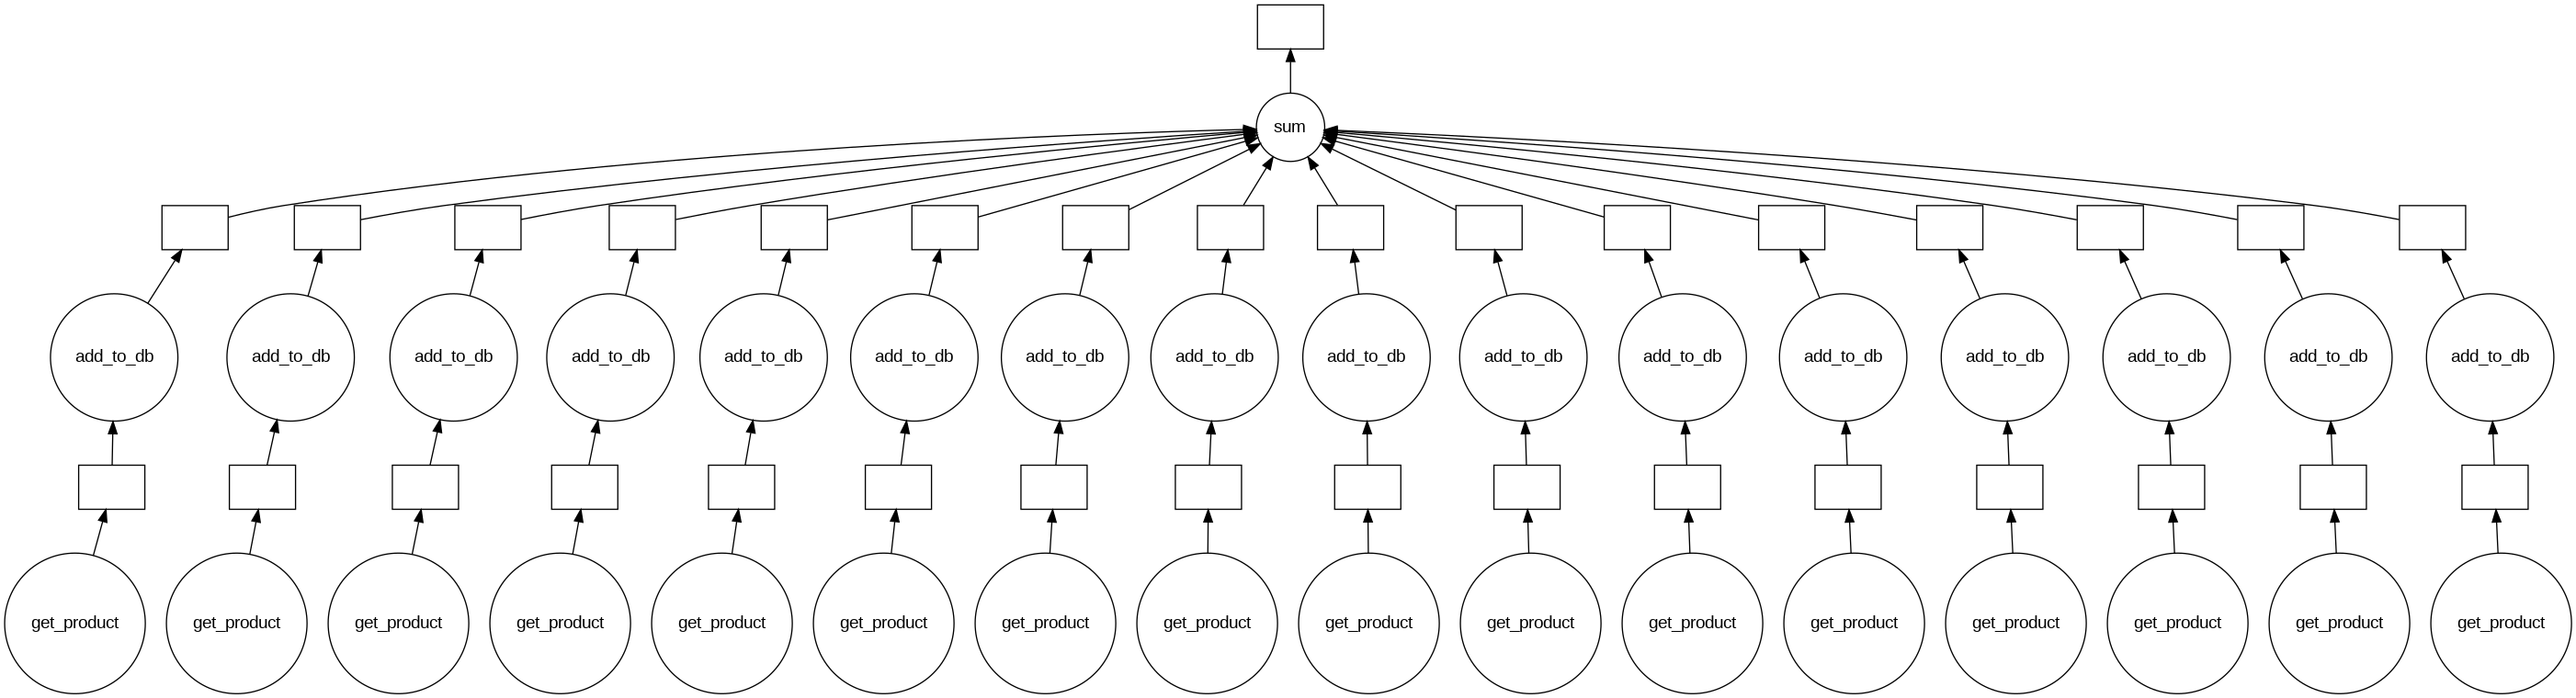

In [390]:
get_product_delayed = dask.delayed(get_product)
add_to_db_delayed = dask.delayed(add_to_db)

list_of_products_delayed = dask.delayed(sum)(
    [add_to_db_delayed(get_product_delayed(i)) for i in range(1,17)]
    )

list_of_products_delayed.visualize()

<p class="task" id="7"></p>

7\. Перестройте граф вычислений таким образом, чтобы на вход `add_to_db` передавалось сразу по 4 товара. Граф вычислений должен иметь следующий вид:

Используя построенный граф, посчитайте общую сумму добавленных товаров и выведите ее на экран. Замерьте время выполнения данного решения.

В качестве демонстрации вставьте скриншот графа в процессе вычислений из дэшборда или результат работы метода `visualize`.

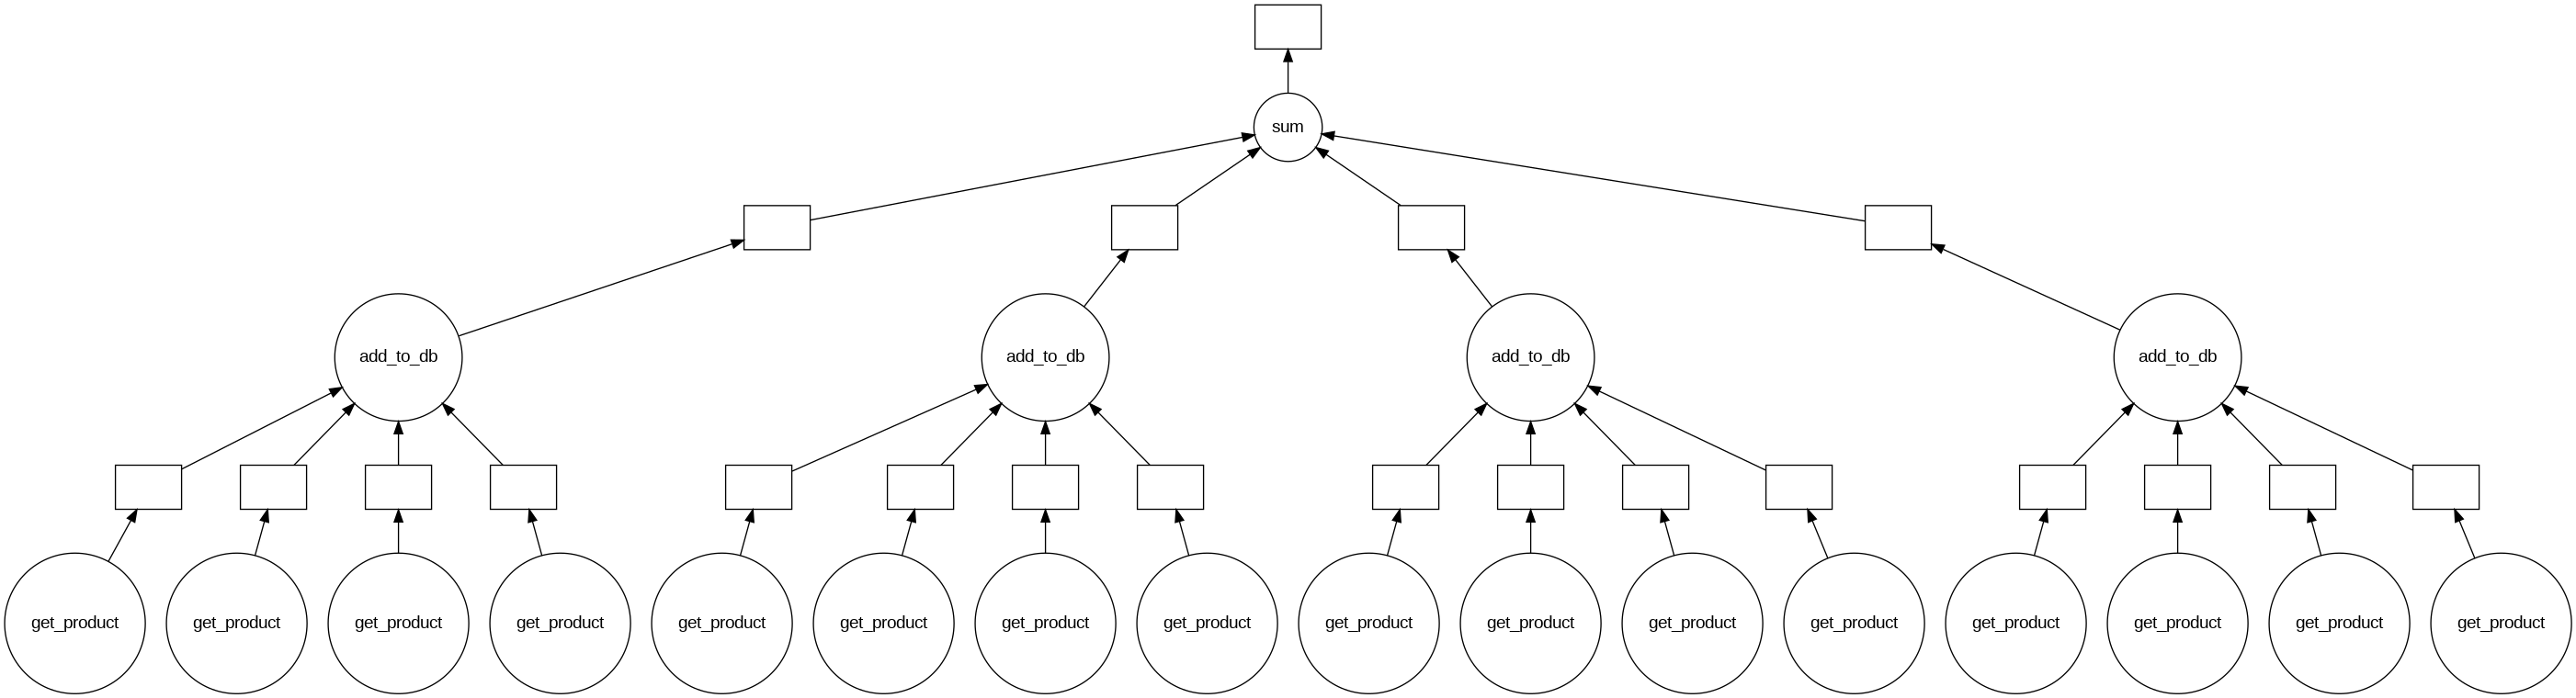

In [433]:
group_prices_delayed = []

for i in range(4):
  group_prices_delayed.append(
      add_to_db_delayed(
          *[get_product_delayed(j) for j in range(i*4+1,(i+1)*4+1)]
          )
      )

price_of_products_delayed = dask.delayed(sum)(group_prices_delayed)
price_of_products_delayed.visualize()

In [434]:
%%time
price_of_products_delayed.compute()

CPU times: user 500 ms, sys: 51.8 ms, total: 552 ms
Wall time: 8.04 s


10656

**Время выполнения уменьшилось в 4.5 раза (с 36.2s до 8.04s)**